# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


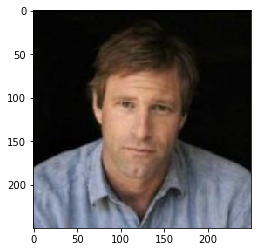

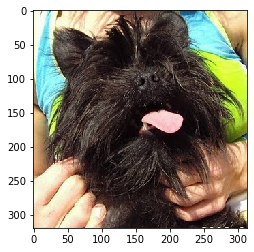

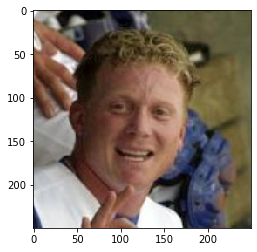

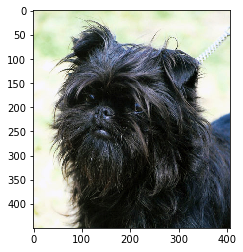

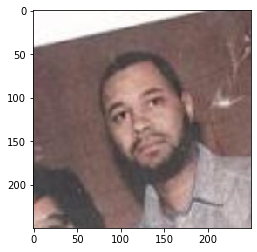

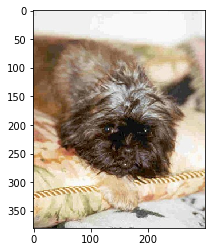

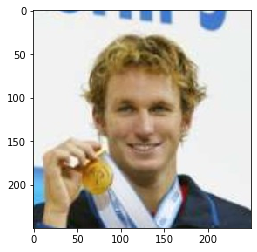

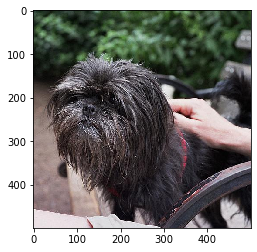

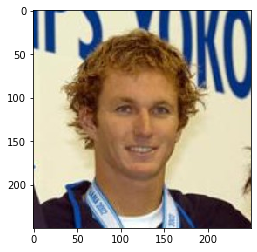

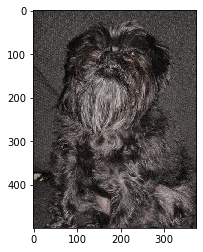

In [16]:
import matplotlib.pyplot as plt
import cv2 

def show(img):
    img = cv2.imread(img)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    
for i in range(5):
    show(human_files[i])
    show(dog_files[i])

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


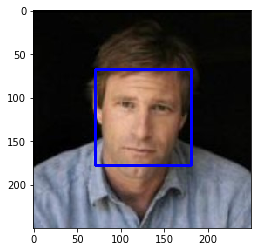

In [17]:
import cv2                
import matplotlib.pyplot as plt 
%matplotlib inline 

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [112]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
As the output printed: 96% of the first 100 images in human_files have a detected human face while only 18% have it of the first 100 images in dog files.

In [113]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def measure_performance(files):
    successful = 0
    
    for f in files:
        successful += face_detector(f)
    
    return successful / len(files)

print("Face Detector - human_files: {}".format(measure_performance(human_files_short)))
print("Face Detector - dog_files: {}".format(measure_performance(dog_files_short)))

Face Detector - human_files: 0.96
Face Detector - dog_files: 0.18


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [114]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [115]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path).convert('RGB')
    
    transform = transforms.Compose([
        transforms.Resize(size=(244,244)), #standard input size to VGG
        transforms.ToTensor(), #convert image to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    img = transform(img)[:3,:,:] #discart alpha channel
    img = img.unsqueeze(0) #add 4th dimension as required by VGG
    
    if use_cuda: #cuda transform if the user uses GPU to compute
        img = img.cuda()
        
    prediction = VGG16(img)
    index = torch.max(prediction, 1)[1].item()
    
    return index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [116]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    lower_bound = 151
    upper_bound = 268
    
    prediction = VGG16_predict(img_path)
    is_dog = (prediction >= lower_bound and prediction <= upper_bound)
    return is_dog # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

# __Answer:__ 
As the output printed: 1% of images in human_files have a detected dog while 94% have it in dog files.

In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def measure_performance_dog(files):
    successful = 0
    
    for f in files:
        successful += dog_detector(f)
    
    return successful / len(files)

print("Dog Detector - human_files: {}".format(measure_performance_dog(human_files_short)))
print("Dog Detector - dog_files: {}".format(measure_performance_dog(dog_files_short)))

Dog Detector - human_files: 0.01
Dog Detector - dog_files: 0.94


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [17]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
dog_dir = 'dogImages/'
train_dir = os.path.join(dog_dir, 'train/')
valid_dir = os.path.join(dog_dir, 'valid/')
test_dir = os.path.join(dog_dir, 'test/')

transform = {'train': transforms.Compose([
    transforms.RandomResizedCrop(224), #random crop for train data
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
           'val': transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
           'test': transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]),
          }

train_data = datasets.ImageFolder(train_dir, transform=transform['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=transform['val'])
test_data = datasets.ImageFolder(test_dir, transform=transform['test'])

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=16, 
                                           num_workers=0,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=16, 
                                           num_workers=0,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=16, 
                                           num_workers=0,
                                           shuffle=False)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}

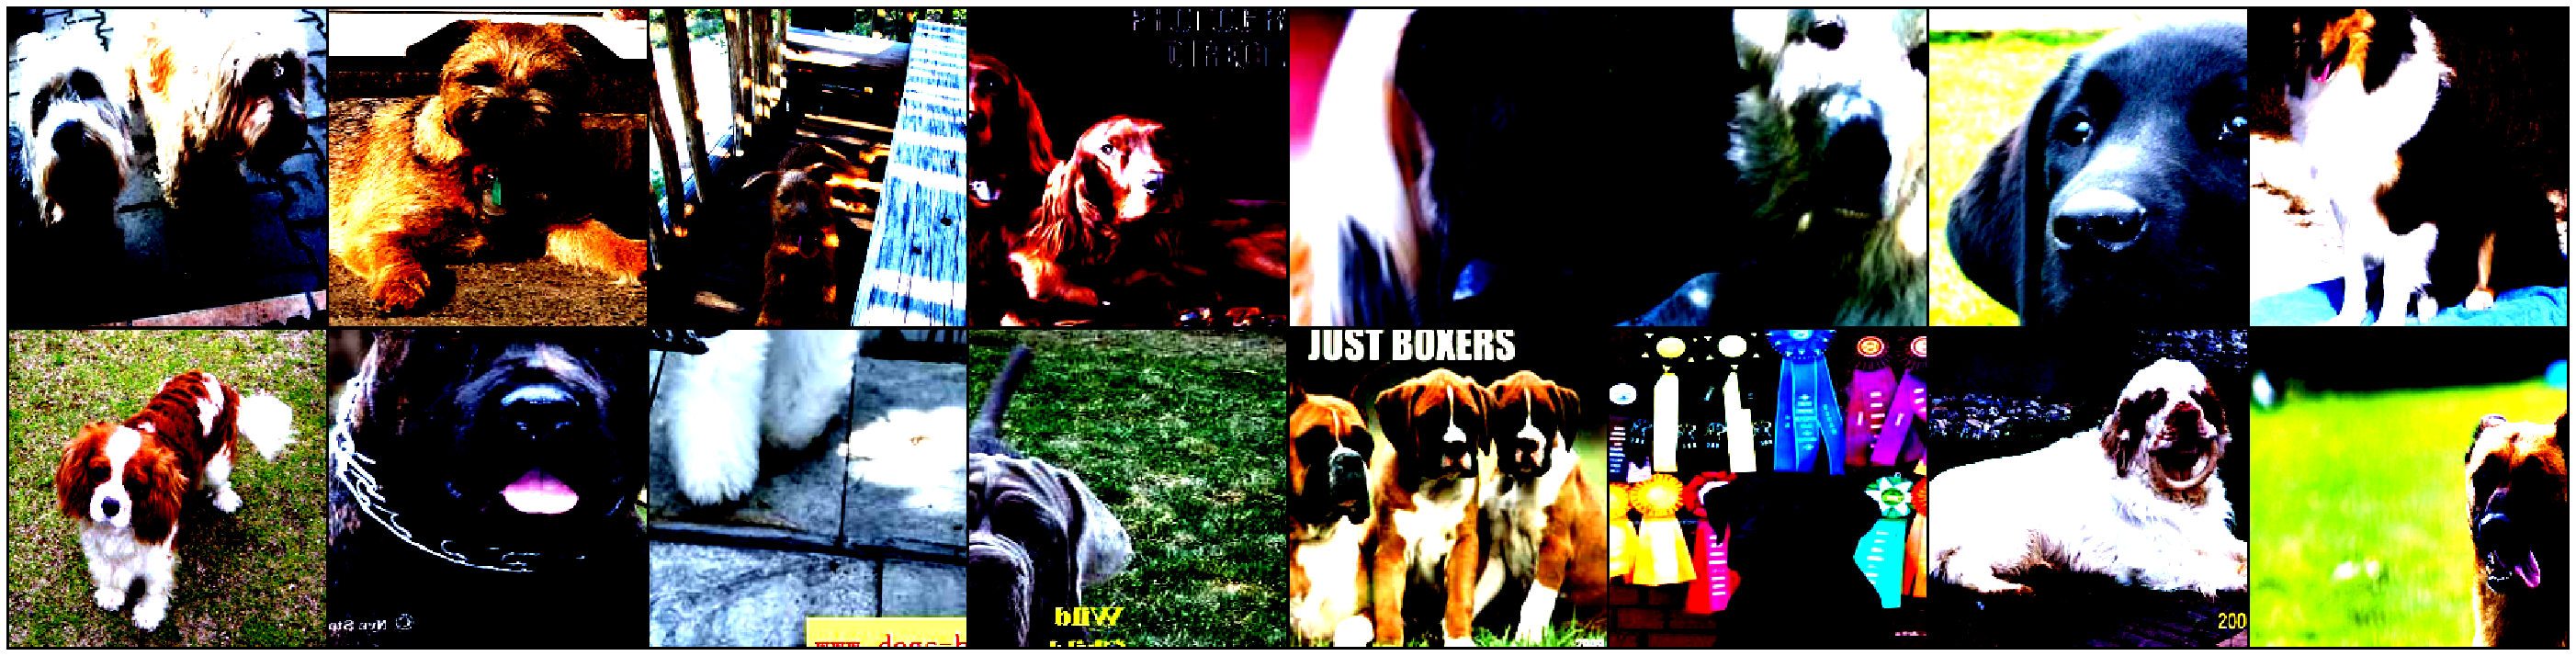

In [17]:
from torchvision import utils
# New function added:
# Visualisation of the image augmentation.
def visualisation(img_input):
    img_input = img_input.numpy().transpose((1,2,0))
    img_input = np.clip(img_input, 0, 1)
    
    fig = plt.figure(figsize=(50, 25))
    plt.axis('off')
    plt.imshow(img_input)
    
   
images, classes = next(iter(loaders_scratch['train']))
grid = utils.make_grid(images)
visualisation(grid)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
1. The code resizes image differently depending on the set it belongs - for train it takes randomised crop of 224x224 to minimise overfitting, for validation set it crops at the center and for test it just uses default reside method. All the inputs are 224x224 which is the standard input dimensions for most CNNs (VGG, ResNet, AlexNet, ZFNet, GoogLeNet, NASNet - all of them works with 224x224 inputs).
2. The dataset augmentation was used to (i.e. random crop, vertifcal flip, normalisation) on the training set to minimise overfitting which occurs when model learns to represent specifically the samples in the training set, not the general class. Increasing randomness in the set should minimise overfitting.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, channels, class_count):
        super(Net, self).__init__()
        
        # Convnet layers:
        # Block 1:
        self.conv1a = nn.Conv2d(3, 64, 3, padding=1)
        
        # Block 2:
        self.conv2a = nn.Conv2d(64, 128, 3, padding=1)
        
        # Block 3:
        self.conv3a = nn.Conv2d(128, 256, 3, padding=1)
        self.conv3b = nn.Conv2d(256, 256, 3, padding=1)
        
        # Block 4:
        self.conv4a = nn.Conv2d(256, 512, 3, padding=1)
        self.conv4b = nn.Conv2d(512, 512, 3, padding=1)
        
        # Block 5:
        self.conv5a = nn.Conv2d(512, 512, 3, padding=1)
        self.conv5b = nn.Conv2d(512, 512, 3, padding=1)

        # Pooling layers:
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully Connected layers:
        self.fc1 = nn.Linear(25088, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 133)

        # Drop-Out Layer:
        self.dropout = nn.Dropout(0.3)
        
        # Activation ReLU:
        self.relu = nn.ReLU(inplace=True)
        
        # Batch Normalization Layers:
        self.batch_norm1 = nn.BatchNorm2d(64)
        self.batch_norm2 = nn.BatchNorm2d(128)
        self.batch_norm3 = nn.BatchNorm2d(256)
        self.batch_norm4 = nn.BatchNorm2d(512)
        
    def forward(self, x):
        ## Define forward behavior
        # Feature Extraction part:
        # Block 1:
        x = self.relu(self.batch_norm1(self.conv1a(x)))
        x = self.pool(x)
        
        # Block 2:
        x = self.relu(self.batch_norm2(self.conv2a(x)))
        x = self.pool(x)
        
        # Block 3:
        x = self.conv3a(x)
        x = self.relu(self.batch_norm3(self.conv3b(x)))
        x = self.pool(x)
        
        # Block 4:
        x = self.conv4a(x)
        x = self.relu(self.batch_norm4(self.conv4b(x)))
        x = self.pool(x)
        
        # Block 5:
        x = self.conv5a(x)
        x = self.relu(self.batch_norm4(self.conv5b(x)))
        x = self.pool(x)
        
        # Classification part:
        # Flatten:
        x = x.view(x.size(0), -1)
        
        # Fully-Connected Layers:
        x = self.dropout(self.fc1(x))
        x = self.dropout(self.fc2(x))
        x = self.fc3(x)
        return x



#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net(3,133)
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1a): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2a): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3a): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3b): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4a): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4b): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5a): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5b): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=133, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU(inplace=True)
  (batch_n

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ The CNN architecture is inspired by VGG11. I wanted to see how it performs compared to the pre-trained VGG16. The main difference between those two is the number of layers - 11 in VGG11, 16 in VGG16. I tried implementation of other famous networks (i.e. AlexNet and ZFNet) but they struggled to get wanted accuracy (10%+) in the next task.

The architecture of the CNN is as following:

a) Convolutional Blocks (Feature Extraction part):

There are 5 blocks, each of them has similar strategy: first there is a Convolution2d, followed by Batch Normalisation then ReLU activation function is applied, and at the end MaxPooling to reduce spacial dimension is added.

1. Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2. Batch Normalisation layer 64
3. ReLU
4. MaxPool2d(2,2)

1. Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2. Batch Normalisation layer 128
3. ReLU
4. MaxPool2d(2,2)

1. Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2. Batch Normalisation layer 256
3. ReLU
4. MaxPool2d(2,2)

1. Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2. Batch Normalisation layer 256
3. ReLU
4. MaxPool2d(2,2)

1. Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
1. Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2. Batch Normalisation layer 512
3. ReLU
4. MaxPool2d(2,2)

1. Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
1. Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
2. Batch Normalisation layer 512
3. ReLU
4. MaxPool2d(2,2)

b) Classification Part:
1. Flatten
2. Fully Connected Layer (25088, 4096)
3. Dropout(0.3)
4. Fully Connected Layer (4096, 4096)
3. Dropout(0.3)
4. Fully Connected Layer (4096, 133)

The Batch Normalisation was not present in the original VGG implementation (it came later with ResNet in 2015), however, I added it since it is a good way to standarise the input and possibly improve the accuracy of the model.

Dropout layer were added to increase randomness and reduce possible overfitting of the model.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, last_validation_loss=None):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    if last_validation_loss is not None:
        valid_loss_min = last_validation_loss
    else:
        valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            # initialize weights to zero
            optimizer.zero_grad()
            # forward step
            output = model(data)
            # calculate loss
            loss = criterion(output, target)
            # backward prop. step
            loss.backward() 
            # gradient step
            optimizer.step() 
            
            # update loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
       
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.4f} --> {:.4f}).  Saving better model.'.format(valid_loss_min, valid_loss)) 
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model


# train the model
use_cuda = True
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.586777 	Validation Loss: 4.617118
Validation loss decreased (inf --> 4.6171).  Saving better model.
Epoch: 2 	Training Loss: 4.454539 	Validation Loss: 4.490163
Validation loss decreased (4.6171 --> 4.4902).  Saving better model.
Epoch: 3 	Training Loss: 4.345674 	Validation Loss: 4.398857
Validation loss decreased (4.4902 --> 4.3989).  Saving better model.
Epoch: 4 	Training Loss: 4.240252 	Validation Loss: 4.329185
Validation loss decreased (4.3989 --> 4.3292).  Saving better model.
Epoch: 5 	Training Loss: 4.141191 	Validation Loss: 4.321353
Validation loss decreased (4.3292 --> 4.3214).  Saving better model.
Epoch: 6 	Training Loss: 4.054660 	Validation Loss: 4.409719
Epoch: 7 	Training Loss: 3.987124 	Validation Loss: 4.312366
Validation loss decreased (4.3214 --> 4.3124).  Saving better model.
Epoch: 8 	Training Loss: 3.899882 	Validation Loss: 4.191396
Validation loss decreased (4.3124 --> 4.1914).  Saving better model.
Epoch: 9 	Training Loss: 3.83154

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.605581


Test Accuracy: 16% (137/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [73]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

num_ftrs = model_transfer.fc.in_features #get the output of the last FC layer of resnet
model_transfer.fc = nn.Linear(num_ftrs, 133, bias=True)

print(model_transfer)

use_cuda = True
if use_cuda:
    model_transfer = model_transfer.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ ResNet is a good model developed by Microsoft Research that won 2015 ImageNet Classification Challenge. It is very well suited for the task of classifying dogs' breeds. ResNet was revolutionary in several things - the team behind it aimed to show how deep CNNs can go (before ResNet CNNs couldn't go very deep because of vanishing gradient problem where the gradient of learning function came close to 0 in deep models so they started to losing accuracy after certain depth). ResNet used identity shortcut connection blocks to skip layers in order to nivelate vanishing gradient problem.

I loaded the pretrained model using torch.models module, then I frooze part of the model using "requires_grad = False" and then I changed the final classification Fully-Connected Layer to output 133 classes.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [74]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.0005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [75]:
import numpy as np

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, last_validation_loss=None):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    if last_validation_loss is not None:
        valid_loss_min = last_validation_loss
    else:
        valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            # initialize weights to zero
            optimizer.zero_grad()
            # forward step
            output = model(data)
            # calculate loss
            loss = criterion(output, target)
            # backward prop. step
            loss.backward() 
            # gradient step
            optimizer.step() 
            
            # update loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
       
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.4f} --> {:.4f}).  Saving better model.'.format(valid_loss_min, valid_loss)) 
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model


In [76]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.862248 	Validation Loss: 4.773239
Validation loss decreased (inf --> 4.7732).  Saving better model.
Epoch: 2 	Training Loss: 4.723204 	Validation Loss: 4.633006
Validation loss decreased (4.7732 --> 4.6330).  Saving better model.
Epoch: 3 	Training Loss: 4.596895 	Validation Loss: 4.502765
Validation loss decreased (4.6330 --> 4.5028).  Saving better model.
Epoch: 4 	Training Loss: 4.483613 	Validation Loss: 4.364538
Validation loss decreased (4.5028 --> 4.3645).  Saving better model.
Epoch: 5 	Training Loss: 4.375734 	Validation Loss: 4.243706
Validation loss decreased (4.3645 --> 4.2437).  Saving better model.
Epoch: 6 	Training Loss: 4.265601 	Validation Loss: 4.120520
Validation loss decreased (4.2437 --> 4.1205).  Saving better model.
Epoch: 7 	Training Loss: 4.155459 	Validation Loss: 3.997507
Validation loss decreased (4.1205 --> 3.9975).  Saving better model.
Epoch: 8 	Training Loss: 4.054046 	Validation Loss: 3.893954
Validation loss decreased (3.997

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [78]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [79]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 2.561517


Test Accuracy: 65% (546/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [106]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['test'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                              ])
        

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    
    model = model_transfer.cpu()
    prediction = torch.argmax(model(image))
    return class_names[prediction]

loaders_transfer['test'].dataset.classes[:30]

for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    prediction = predict_breed_transfer(img_path)
    class_name = img_path.replace("./images\\", "")
    print("image name: {} \n prediction: {}".format(class_name, prediction))
    

image name: American_water_spaniel_00648.jpg 
 prediction: Curly-coated retriever
image name: Brittany_02625.jpg 
 prediction: Brittany
image name: Curly-coated_retriever_03896.jpg 
 prediction: Curly-coated retriever
image name: Labrador_retriever_06449.jpg 
 prediction: Flat-coated retriever
image name: Labrador_retriever_06455.jpg 
 prediction: Chesapeake bay retriever
image name: Labrador_retriever_06457.jpg 
 prediction: Labrador retriever
image name: sample_cnn.png 
 prediction: Affenpinscher
image name: sample_dog_output.png 
 prediction: Italian greyhound
image name: sample_human_output.png 
 prediction: Affenpinscher
image name: Welsh_springer_spaniel_08203.jpg 
 prediction: Welsh springer spaniel


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

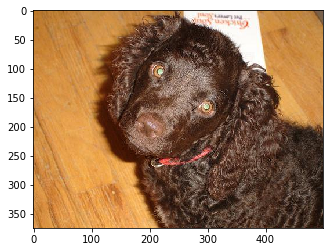

It is a dog! It looks like a Curly-coated retriever


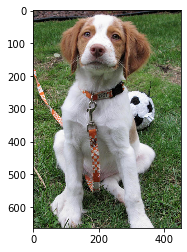

It is a dog! It looks like a Brittany


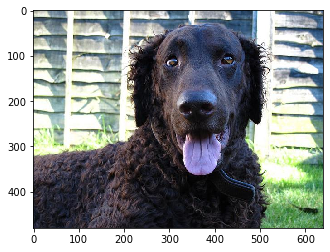

It is a dog! It looks like a Curly-coated retriever


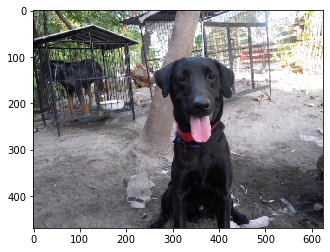

It is a dog! It looks like a Flat-coated retriever


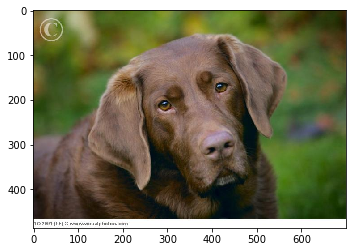

It is a dog! It looks like a Chesapeake bay retriever


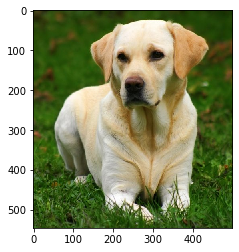

It is a dog! It looks like a Labrador retriever


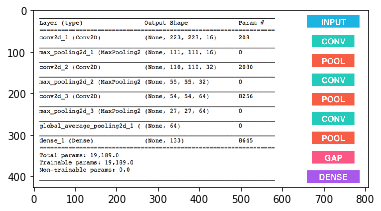

You are not a human nor a dog!


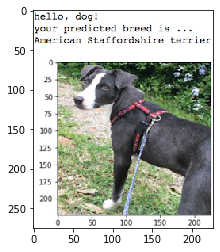

It is a dog! It looks like a Italian greyhound


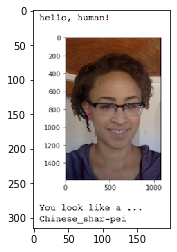

Hello, Human! 
 You look like a... Affenpinscher


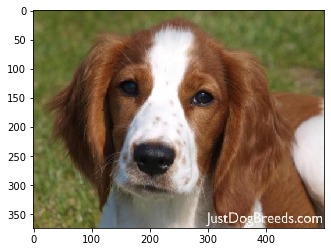

It is a dog! It looks like a Welsh springer spaniel


In [119]:

### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def plot(img):
    plt.imshow(img)
    plt.show()
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    image = Image.open(img_path)
    plot(image)
    
    is_dog = dog_detector(img_path)
    prediction = predict_breed_transfer(img_path)
    if is_dog: #check if it is a dog
        print("It is a dog! It looks like a {}".format(prediction))
    elif face_detector(img_path) > 0: #check if it is a human
        print("Hello, Human! \n You look like a... {}".format(prediction))
    else: #if not human nor dog
        print("You are not a human nor a dog!")
        
for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    run_app(img_path)


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output could be better, the improvement could be made in:
1. Better dataset with larger number of high-quality images should greatly increase the occuracy. Some classes of the dog have only 4-5 images, it is not enough to train properly recognising the class.
2. Longer training - due to computational power needed only 20 epochs could be done for transfer learning model, as we see with more epochs the accuracy increases and the training hasn't started to converge yet and it hasn't reached the possible global minimum of loss function.
3. There are ways like 'mixture of experts' or 'decision fusion' where we can take predictions from 2 or more models and weight them appropriately and then create one final prediction - though it is very expensive to do so in terms of computing power compared to just 1 model.

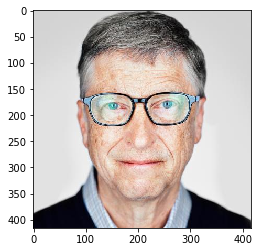

Hello, Human! 
 You look like a... Havanese


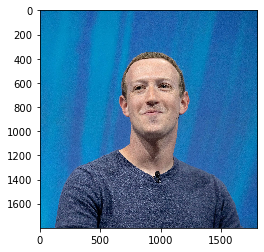

Hello, Human! 
 You look like a... Italian greyhound


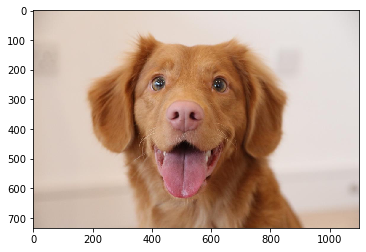

It is a dog! It looks like a Nova scotia duck tolling retriever


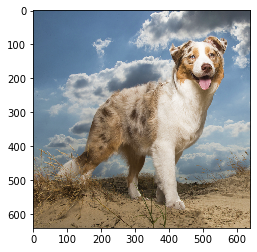

It is a dog! It looks like a Dalmatian


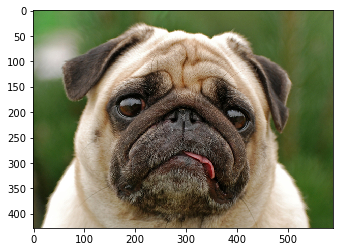

It is a dog! It looks like a Bulldog


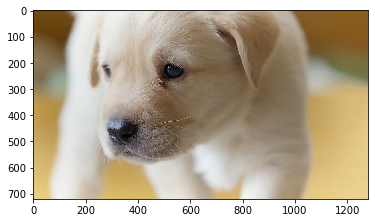

It is a dog! It looks like a Great pyrenees


In [123]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
human_files = ['./step6images/human1.jpg', './step6images/human2.jpg']
dog_files = ['./step6images/dog1.jpg', './step6images/dog2.png', './step6images/dog3.jpg', './step6images/dog4.jpg']

for file in np.hstack((human_files[:2], dog_files[:4])):
    run_app(file)